In [14]:
import pandas as pd
from scipy import stats
import numpy as np
import wquantiles
import statsmodels
from statsmodels import robust

In [2]:
df = pd.read_csv("../data/state.csv")

In [3]:
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [4]:
print(f"The mean of population is: {df.Population.mean()}")
print(f"The median of population is: {df.Population.median()}")
print(f"The trimmed mean of population is: {stats.trim_mean(df.Population, 0.1)}")

The mean of population is: 6162876.3
The median of population is: 4436369.5
The trimmed mean of population is: 4783697.125


- Robust estimators of a variable are the trimmed mean and the median. Notice that the mean above, is effected by outliers and so this tells us that the data is likely to be non-normally distributed.
- The robust methods are better estimators for distributions that are not normal.
- Weighted means and medians are used when the variable to be measured, is effected by another.

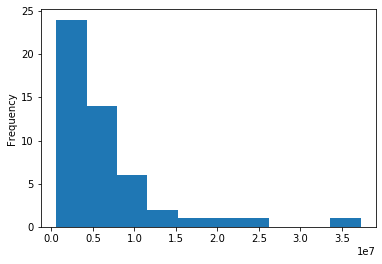

In [5]:
df.Population.plot(kind='hist')

In [6]:
# weighted means and medians
print(f"The weighted mean for murder rate is: {np.average(df['Murder.Rate'], weights=df.Population)}")
print(f"The weighted median for murder rate is: {wquantiles.median(df['Murder.Rate'], weights=df.Population)}")
print(f"The unweighted mean for murder rate is: {df['Murder.Rate'].mean()}")

The weighted mean for murder rate is: 4.445833981123393
The weighted median for murder rate is: 4.4
The unweighted mean for murder rate is: 4.066


- Deviation is the difference between observed values and the estimated value e.g. mean.
- Variance is measured as the sum of squared deviations from the mean / n-1 where n is the number of observed values.
    - Mean Square Error
- Mean absolute deviation is the mean absolute deviation from the mean.
    - l1 norm
    - Manhattan distance
- Median absolute deviation from the median is the median absolute deviation from the median.
    - Robust to outliers

In [15]:
# variance and std
print(f"The std of population is: {df.Population.std()}")
print(f"The iqr of population is: {df.Population.quantile(.75) - df.Population.quantile(.25)}")
print(f"The median absolute deviation (mad) is: {robust.scale.mad(df.Population)}")

The std of population is: 6848235.347401142
The iqr of population is: 4847308.0
The median absolute deviation (mad) is: 3849876.1459979336


In [16]:
df['Murder.Rate'].quantile([.05,0.25,.5,.75,.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [13]:
robust.scale.mad(df.Population)

3849876.1459979336